# Zeroth-Order Frank Wolfe for Black-Box Adversarial Attacks



In [ ]:
!pip install tensorflow keras

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import shutil

In [ ]:
# if using google drive on colab

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# if using git clone and runtime space on colab

!git clone https://github.com/marcouderzo/FW-AdversarialAttacks

os.chdir('FW-AdversarialAttacks')

Cloning into 'FW-AdversarialAttacks'...
remote: Enumerating objects: 649, done.
remote: Counting objects: 100% (606/606), done.
remote: Compressing objects: 100% (407/407), done.
remote: Total 649 (delta 270), reused 516 (delta 192), pack-reused 43
Receiving objects: 100% (649/649), 19.22 MiB | 38.06 MiB/s, done.
Resolving deltas: 100% (272/272), done.


In [ ]:
os.path.abspath('Universal_Attack.py')

'/content/FW-AdversarialAttacks/Universal_Attack.py'

## FZCGS

In [ ]:
#FZCGS

!python3 Universal_Attack.py -optimizer FZCGS -nStage 200


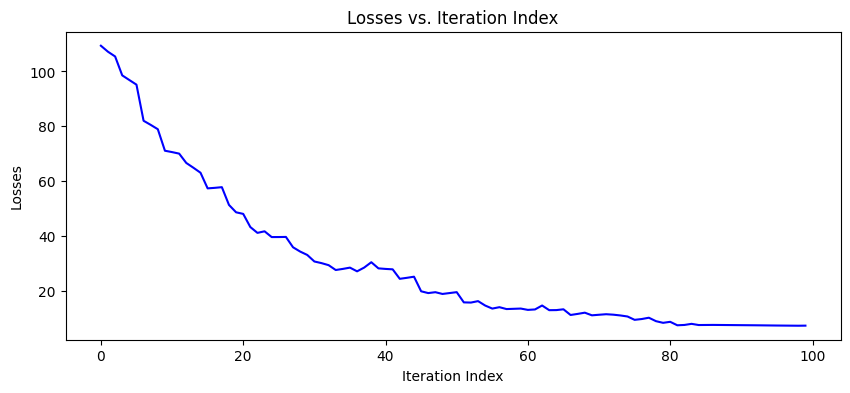

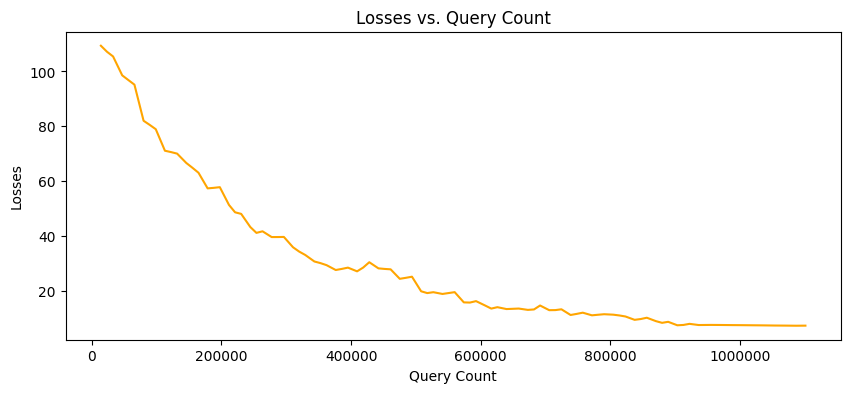

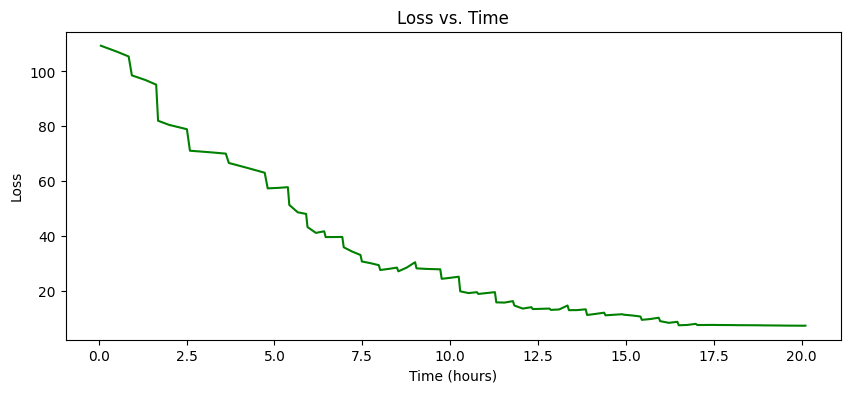

In [2]:
path = 'Results/FZCGS/'

iteration_index_FZCGS = []
query_count_FZCGS = []
losses_FZCGS = []
times_FZCGS = []

loss_l2_values = []
loss_attack_values = []

file_path = path + 'log.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()



for line in lines:
    if 'Iteration Index:' in line:
        words = line.split()
        iteration_index_FZCGS.append(int(words[2]))
        losses_FZCGS.append(float(words[6]))
        query_count_FZCGS.append(int(words[4]))
        times_FZCGS.append(float(words[14])/3600) # in hours
        loss_l2_values.append(float(words[8]))
        loss_attack_values.append(float(words[10])) 


iteration_index_FZCGS = np.array(iteration_index_FZCGS)
losses_FZCGS = np.array(losses_FZCGS)
query_count_FZCGS = np.array(query_count_FZCGS)
times_FZCGS = np.array(times_FZCGS)
loss_l2_values = np.array(loss_l2_values)
loss_attack_values = np.array(loss_attack_values)

#print("Iteration Index:", iteration_index_FZCGS)
#print("Losses:", losses_FZCGS)
#print("Query Count:", query_count_FZCGS)
#print("Times:", times_FZCGS)

# Plotting losses vs. iteration index
plt.figure(figsize=(10, 4))
plt.plot(iteration_index_FZCGS, losses_FZCGS, color='b')
plt.title('Losses vs. Iteration Index')
plt.xlabel('Iteration Index')
plt.ylabel('Losses')


# Plotting losses vs. query count
plt.figure(figsize=(10, 4))
plt.plot(query_count_FZCGS, losses_FZCGS, color='orange')
plt.title('Losses vs. Query Count')
plt.xlabel('Query Count')
plt.ylabel('Losses')
plt.ticklabel_format(style='plain')

# Plotting loss vs. time
plt.figure(figsize=(10, 4))
plt.plot(times_FZCGS, losses_FZCGS, color='green')
plt.title('Loss vs. Time')
plt.xlabel('Time (hours)')
plt.ylabel('Loss')
plt.ticklabel_format(style='plain')


plt.ticklabel_format(style='plain')
#plt.tight_layout()
plt.show()


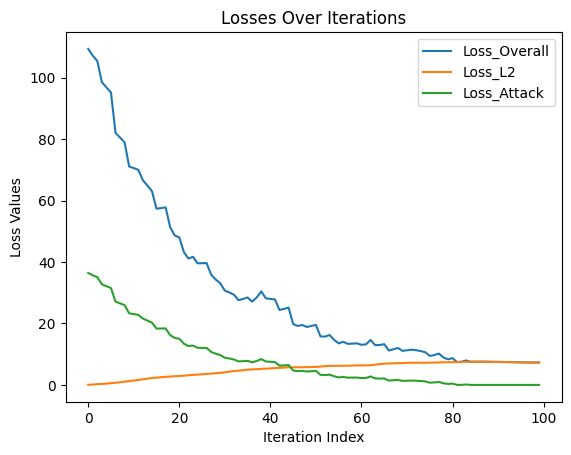

In [3]:
plt.plot(range(len(losses_FZCGS)), losses_FZCGS, label='Loss_Overall')
plt.plot(range(len(loss_l2_values)), loss_l2_values, label='Loss_L2')
plt.plot(range(len(loss_attack_values)), loss_attack_values, label='Loss_Attack')
plt.xlabel('Iteration Index')
plt.ylabel('Loss Values')
plt.title('Losses Over Iterations')
plt.legend()
plt.show()

In [4]:
min_loss = np.min(losses_FZCGS)
print(min_loss)

min_loss_index = np.argmin(losses_FZCGS)
print(min_loss_index)

last_loss = losses_FZCGS[len(losses_FZCGS)-1]
print(last_loss)

print(query_count_FZCGS[len(query_count_FZCGS)-1])

print(times_FZCGS[len(times_FZCGS)-1])

7.283030919829525
98
7.312289962878222
1100736
20.10691230535507


## SGFFW with RDSA

In [ ]:
#SGFFW with RDSA

!python3 Universal_Attack.py -optimizer SGFFW -grad_approx_scheme RDSA -nStage 6000

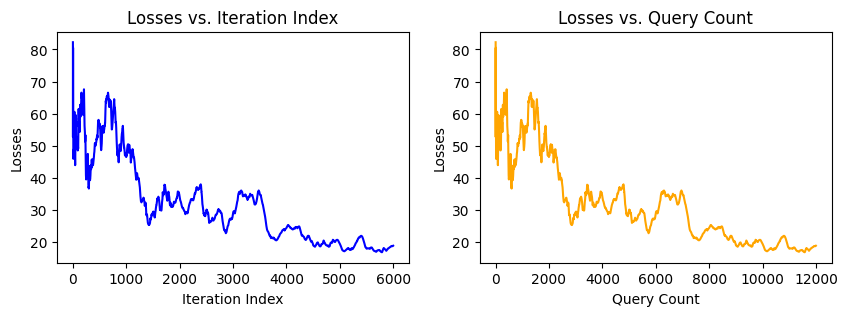

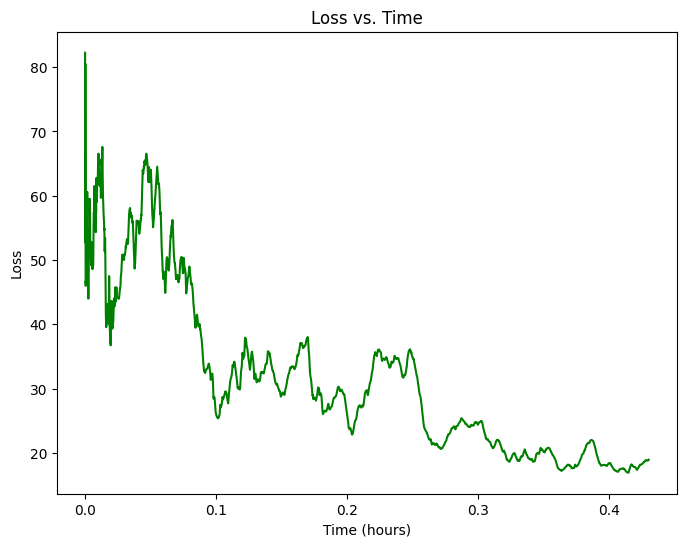

In [6]:
path = 'Results/SGFFW/RDSA/'

iteration_index= []
query_count = []
losses = []
times = []


file_path = path + 'log.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()


for line in lines:
    if 'Iteration Index:' in line:
        words = line.split()
        iteration_index.append(int(words[2]))
        losses.append(float(words[6]))
        query_count.append(int(words[4]))
        times.append(float(words[14])/3600) # in hours
        #print(float(words[14]))


iteration_index_RDSA = np.array(iteration_index)
losses_RDSA = np.array(losses)
query_count_RDSA = np.array(query_count)
times_RDSA = np.array(times)


#print("Iteration Index:", iteration_index_RDSA)
#print("Losses:", losses_RDSA)
#print("Query Count:", query_count_RDSA)
#print("Times:", times_RDSA)


# Plotting losses vs. iteration index
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(iteration_index_RDSA, losses_RDSA, color='b')
plt.title('Losses vs. Iteration Index')
plt.xlabel('Iteration Index')
plt.ylabel('Losses')

# Plotting losses vs. query count
plt.subplot(1, 2, 2)
plt.plot(query_count_RDSA, losses_RDSA, color='orange')
plt.title('Losses vs. Query Count')
plt.xlabel('Query Count')
plt.ylabel('Losses')


# Plotting loss vs. time
plt.figure(figsize=(8, 6))
plt.plot(times_RDSA, losses_RDSA, color='green')
plt.title('Loss vs. Time')
plt.xlabel('Time (hours)')
plt.ylabel('Loss')
plt.ticklabel_format(style='plain')



plt.ticklabel_format(style='plain')

#plt.tight_layout()
plt.show()


In [48]:
min_loss = np.min(losses_RDSA)
print(min_loss)

min_loss_index = np.argmin(losses_RDSA)
print(min_loss_index)

last_loss = losses_RDSA[len(losses_RDSA)-1]
print(last_loss)

print(query_count_RDSA[len(query_count_RDSA)-1])

print(times_RDSA[len(times_RDSA)-1])

16.900398072858874
5788
18.922422599985403
12000
0.43009988870885635


## SGFFW with I-RDSA

In [ ]:
#SGFFW with I-RDSA

!python3 Universal_Attack.py -optimizer SGFFW -grad_approx_scheme I-RDSA -nStage 500

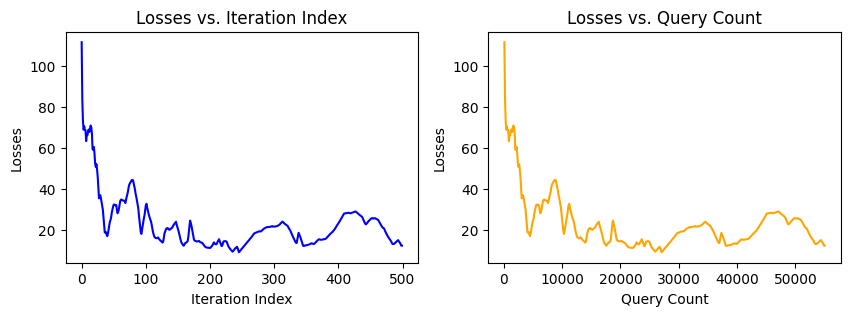

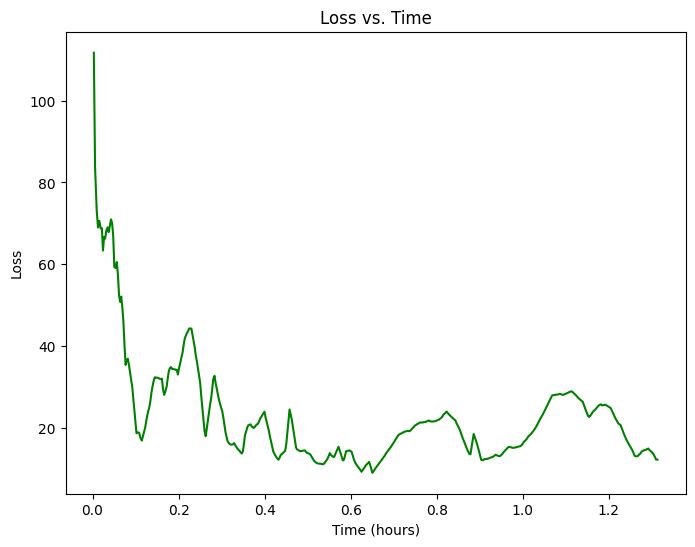

In [7]:
path = 'Results/SGFFW/I-RDSA/'

iteration_index= []
query_count = []
losses = []
times = []


file_path = path + 'log.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()


for line in lines:
    if 'Iteration Index:' in line:
        words = line.split()
        iteration_index.append(int(words[2]))
        losses.append(float(words[6]))
        query_count.append(int(words[4]))
        times.append(float(words[14])/3600) # in hours


iteration_index_IRDSA = np.array(iteration_index)
losses_IRDSA = np.array(losses)
query_count_IRDSA = np.array(query_count)
times_IRDSA = np.array(times)

#print("Iteration Index:", iteration_index_IRDSA)
#print("Losses:", losses_IRDSA)
#print("Query Count:", query_count_IRDSA)
#print("Times:", times_RDSA)

# Plotting losses vs. iteration index
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(iteration_index_IRDSA, losses_IRDSA, color='b')
plt.title('Losses vs. Iteration Index')
plt.xlabel('Iteration Index')
plt.ylabel('Losses')

# Plotting losses vs. query count
plt.subplot(1, 2, 2)
plt.plot(query_count_IRDSA, losses_IRDSA, color='orange')
plt.title('Losses vs. Query Count')
plt.xlabel('Query Count')
plt.ylabel('Losses')
plt.ticklabel_format(style='plain')

# Plotting loss vs. time
plt.figure(figsize=(8, 6))
plt.plot(times_IRDSA, losses_IRDSA, color='green')
plt.title('Loss vs. Time')
plt.xlabel('Time (hours)')
plt.ylabel('Loss')
plt.ticklabel_format(style='plain')


#plt.tight_layout()
plt.show()



In [49]:
min_loss = np.min(losses_IRDSA)
print(min_loss)

min_loss_index = np.argmin(losses_IRDSA)
print(min_loss_index)

last_loss = losses_IRDSA[len(losses_IRDSA)-1]
print(last_loss)

print(query_count_IRDSA[len(query_count_IRDSA)-1])

print(times_IRDSA[len(times_IRDSA)-1])

8.960981360437081
245
12.156899036629548
55000
1.31288403722975


## SGFFW with KWSA

In [ ]:
#SGFFW with KWSA

!python3 Universal_Attack.py -optimizer SGFFW -grad_approx_scheme KWSA -nStage 200


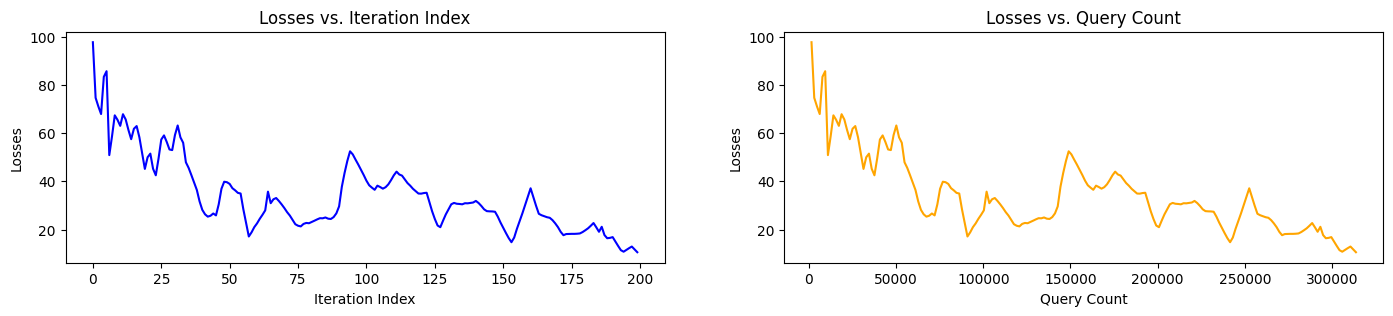

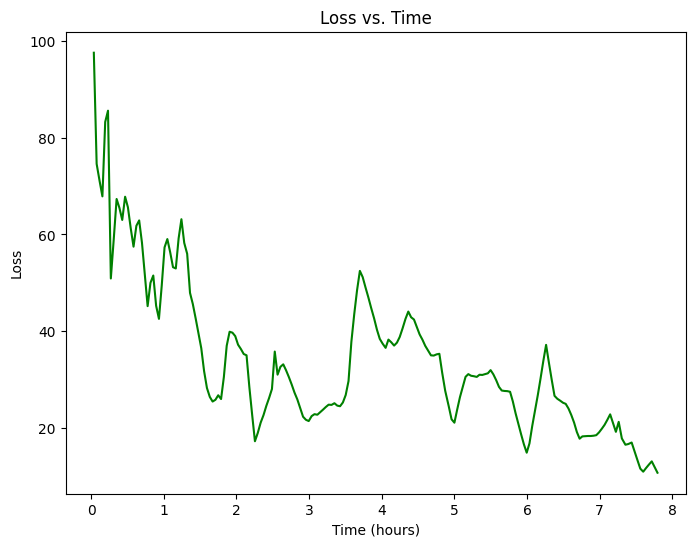

In [8]:
path = 'Results/SGFFW/KWSA/'

iteration_index= []
query_count = []
losses = []
times = []


file_path = path + 'log.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()


for line in lines:
        if 'Iteration Index:' in line:
            words = line.split()
            iteration_index.append(int(words[2]))
            losses.append(float(words[6]))
            query_count.append(int(words[4]))
            times.append(float(words[14])/3600) # in hours



iteration_index_KWSA = np.array(iteration_index)
losses_KWSA= np.array(losses)
query_count_KWSA = np.array(query_count)
times_KWSA = np.array(times)

#print("Iteration Index:", iteration_index_KWSA)
#print("Losses:", losses_KWSA)
#print("Query Count:", query_count_KWSA)
#print("Times:", times_KWSA)


# Plotting losses vs. iteration index
plt.figure(figsize=(17, 3))
plt.subplot(1, 2, 1)
plt.plot(iteration_index_KWSA, losses_KWSA, color='b')
plt.title('Losses vs. Iteration Index')
plt.xlabel('Iteration Index')
plt.ylabel('Losses')

# Plotting losses vs. query count
plt.subplot(1, 2, 2)
plt.plot(query_count_KWSA, losses_KWSA, color='orange')
plt.title('Losses vs. Query Count')
plt.xlabel('Query Count')
plt.ylabel('Losses')

# Plotting loss vs. time
plt.figure(figsize=(8, 6))
plt.plot(times_KWSA, losses_KWSA, color='green')
plt.title('Loss vs. Time')
plt.xlabel('Time (hours)')
plt.ylabel('Loss')
plt.ticklabel_format(style='plain')

plt.ticklabel_format(style='plain')
plt.show()



In [50]:
min_loss = np.min(losses_KWSA)
print(min_loss)

min_loss_index = np.argmin(losses_KWSA)
print(min_loss_index)

last_loss = losses_KWSA[len(losses_KWSA)-1]
print(last_loss)

print(query_count_KWSA[len(query_count_KWSA)-1])

print(times_KWSA[len(times_KWSA)-1])

10.646701468419149
199
10.646701468419149
313600
7.796367409361733


### SGFFW with all Gradient Approximation Schemes Compared

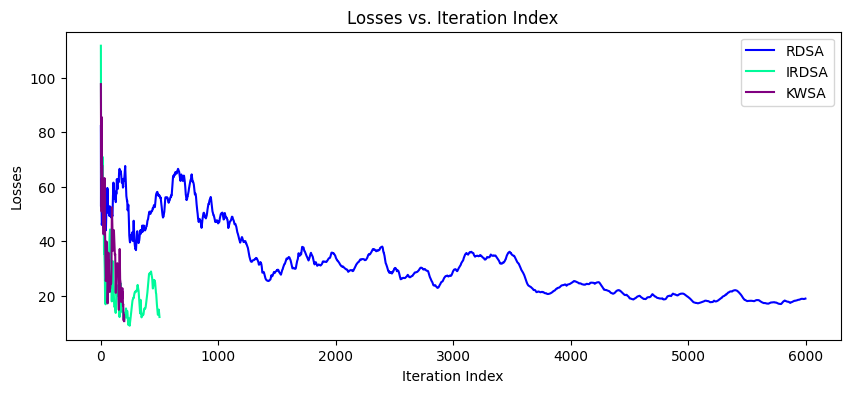

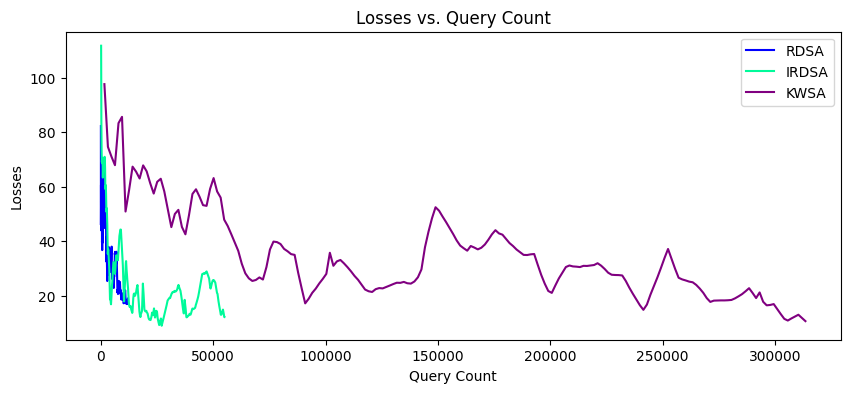

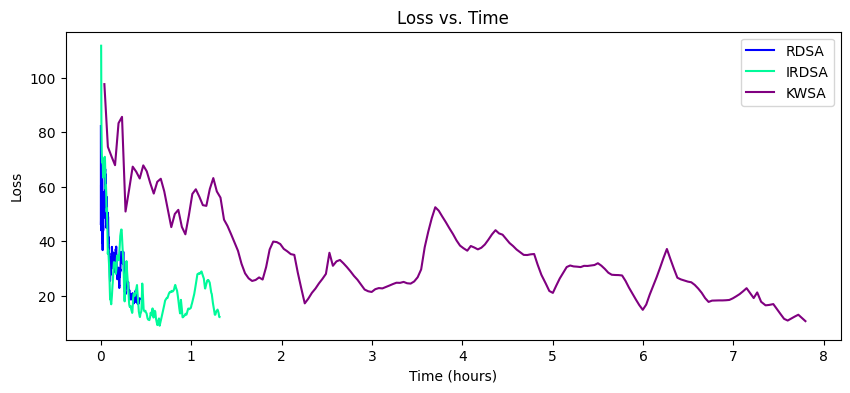

In [20]:
# Plotting losses vs. iteration index
plt.figure(figsize=(10, 4))
plt.plot(iteration_index_RDSA, losses_RDSA, color='blue', label='RDSA')
plt.plot(iteration_index_IRDSA, losses_IRDSA, color='mediumspringgreen', label='IRDSA')
plt.plot(iteration_index_KWSA, losses_KWSA, color='purple', label='KWSA')
plt.title('Losses vs. Iteration Index')
plt.xlabel('Iteration Index')
plt.ylabel('Losses')
plt.legend()

# Plotting losses vs. query count
plt.figure(figsize=(10, 4))
plt.plot(query_count_RDSA, losses_RDSA, color='blue', label='RDSA')
plt.plot(query_count_IRDSA, losses_IRDSA, color='mediumspringgreen', label='IRDSA')
plt.plot(query_count_KWSA, losses_KWSA, color='purple', label='KWSA')
plt.title('Losses vs. Query Count')
plt.xlabel('Query Count')
plt.ylabel('Losses')
plt.legend()

# Plotting loss vs. time
plt.figure(figsize=(10, 4))
plt.plot(times_RDSA, losses_RDSA, color='blue', label='RDSA')
plt.plot(times_IRDSA, losses_IRDSA, color='mediumspringgreen', label='IRDSA')
plt.plot(times_KWSA, losses_KWSA, color='purple', label='KWSA')
plt.title('Loss vs. Time')
plt.xlabel('Time (hours)')
plt.ylabel('Loss')
plt.legend()
plt.ticklabel_format(style='plain')




plt.show()

## All Algorithms Compared

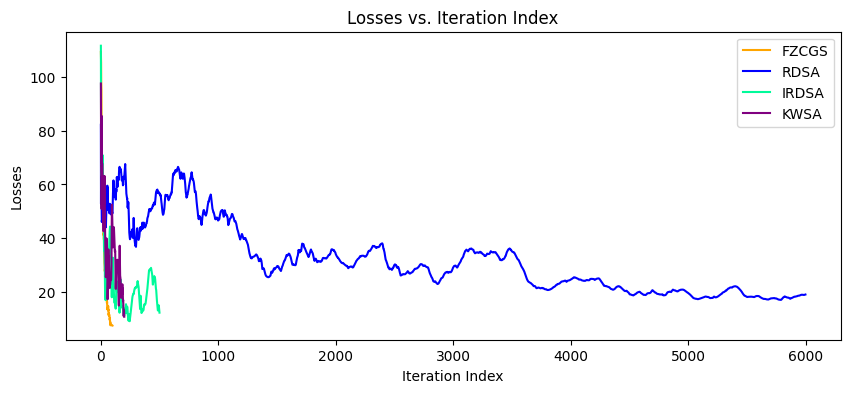

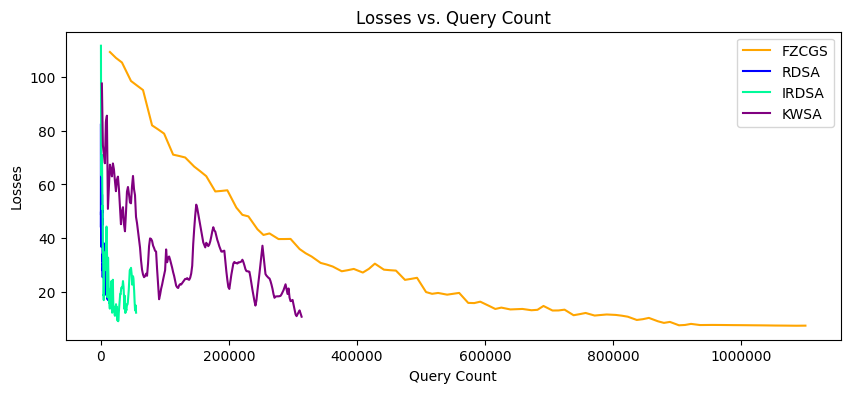

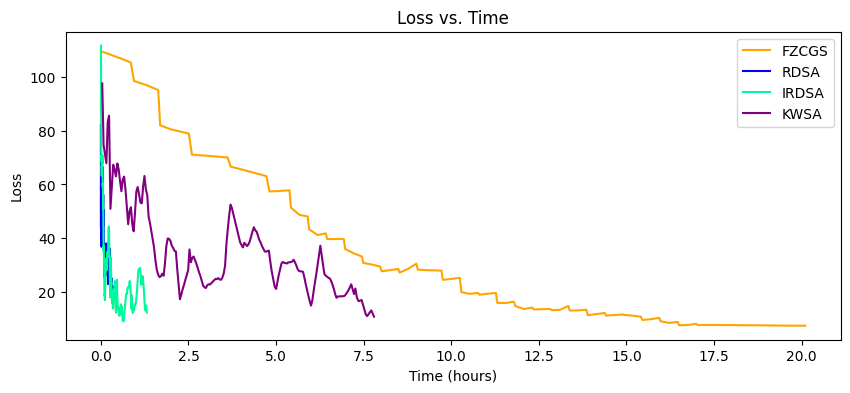

In [9]:
# Plotting losses vs. iteration index
plt.figure(figsize=(10, 4))
plt.plot(iteration_index_FZCGS, losses_FZCGS,color='orange', label='FZCGS')
plt.plot(iteration_index_RDSA, losses_RDSA, color='blue', label='RDSA')
plt.plot(iteration_index_IRDSA, losses_IRDSA, color='mediumspringgreen', label='IRDSA')
plt.plot(iteration_index_KWSA, losses_KWSA, color='purple', label='KWSA')
plt.title('Losses vs. Iteration Index')
plt.xlabel('Iteration Index')
plt.ylabel('Losses')
plt.legend()

# Plotting losses vs. query count
plt.figure(figsize=(10, 4))
plt.plot(query_count_FZCGS, losses_FZCGS, color='orange', label='FZCGS')
plt.plot(query_count_RDSA, losses_RDSA, color='blue', label='RDSA')
plt.plot(query_count_IRDSA, losses_IRDSA, color='mediumspringgreen', label='IRDSA')
plt.plot(query_count_KWSA, losses_KWSA, color='purple', label='KWSA')
plt.title('Losses vs. Query Count')
plt.xlabel('Query Count')
plt.ylabel('Losses')
plt.ticklabel_format(style='plain')
plt.legend()

# Plotting loss vs. time
plt.figure(figsize=(10, 4))
plt.plot(times_FZCGS, losses_FZCGS, color='orange', label='FZCGS')
plt.plot(times_RDSA, losses_RDSA, color='blue', label='RDSA')
plt.plot(times_IRDSA, losses_IRDSA, color='mediumspringgreen', label='IRDSA')
plt.plot(times_KWSA, losses_KWSA, color='purple', label='KWSA')
plt.title('Loss vs. Time')
plt.xlabel('Time (hours)')
plt.ylabel('Loss')
plt.legend()
plt.ticklabel_format(style='plain')

plt.show()

Limiting x-axis:

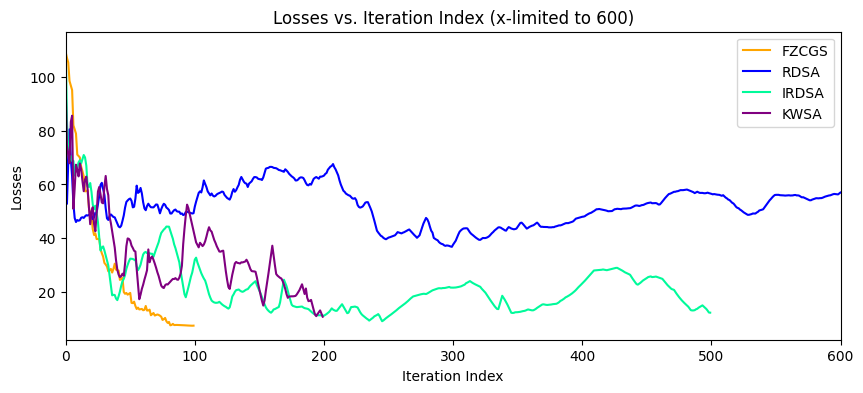

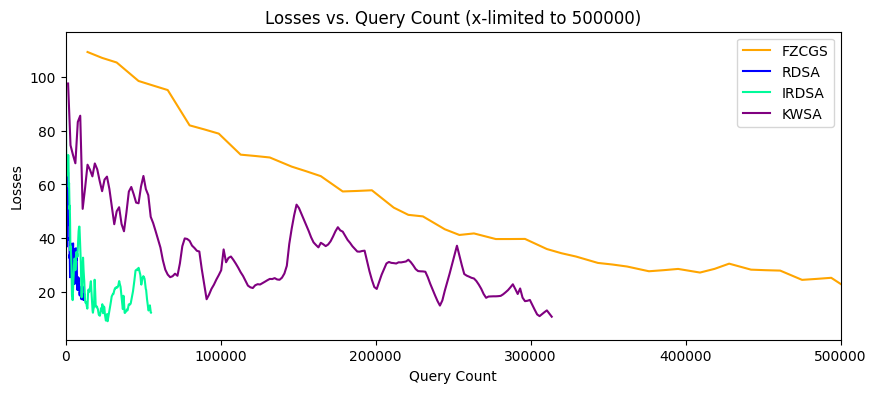

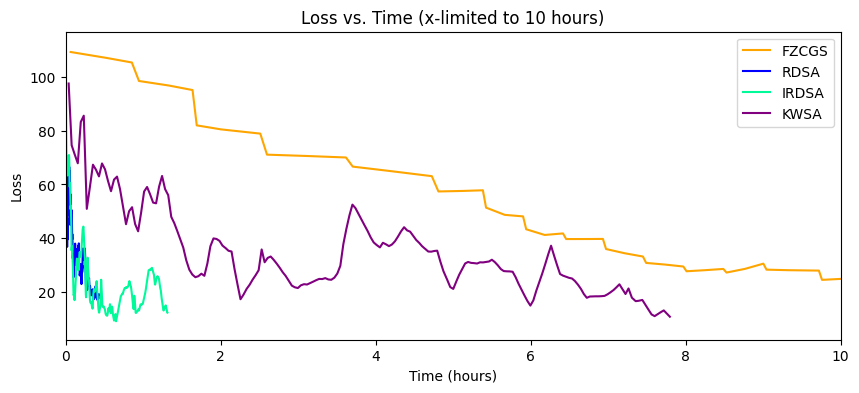

In [10]:

# Plotting losses vs. iteration index
plt.figure(figsize=(10, 4))
plt.plot(iteration_index_FZCGS, losses_FZCGS,color='orange', label='FZCGS')
plt.plot(iteration_index_RDSA, losses_RDSA, color='blue', label='RDSA')
plt.plot(iteration_index_IRDSA, losses_IRDSA, color='mediumspringgreen', label='IRDSA')
plt.plot(iteration_index_KWSA, losses_KWSA, color='purple', label='KWSA')
plt.title('Losses vs. Iteration Index (x-limited to 600)')
plt.xlabel('Iteration Index')
plt.ylabel('Losses')
plt.xlim(0, 600)
plt.legend()

# Plotting losses vs. query count
plt.figure(figsize=(10, 4))
plt.plot(query_count_FZCGS, losses_FZCGS, color='orange', label='FZCGS')
plt.plot(query_count_RDSA, losses_RDSA, color='blue', label='RDSA')
plt.plot(query_count_IRDSA, losses_IRDSA, color='mediumspringgreen', label='IRDSA')
plt.plot(query_count_KWSA, losses_KWSA, color='purple', label='KWSA')
plt.title('Losses vs. Query Count (x-limited to 500000)')
plt.xlabel('Query Count')
plt.ylabel('Losses')
plt.xlim(0, 500000)
plt.ticklabel_format(style='plain')
plt.legend()

# Plotting loss vs. time
plt.figure(figsize=(10, 4))
plt.plot(times_FZCGS, losses_FZCGS, color='orange', label='FZCGS')
plt.plot(times_RDSA, losses_RDSA, color='blue', label='RDSA')
plt.plot(times_IRDSA, losses_IRDSA, color='mediumspringgreen', label='IRDSA')
plt.plot(times_KWSA, losses_KWSA, color='purple', label='KWSA')
plt.title('Loss vs. Time (x-limited to 10 hours)')
plt.xlabel('Time (hours)')
plt.ylabel('Loss')
plt.xlim(0, 10)
plt.legend()
plt.ticklabel_format(style='plain')